In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df_user = pd.read_csv('data/users.csv')
df_transactions = pd.read_csv('data/transactions.csv')

In [63]:
df_user.head()

,user_id,signup_date,country
0,user_1,2023-10-03,FR
1,user_2,2023-08-25,NG
2,user_3,2023-06-16,CA
3,user_4,2022-12-06,BR
4,user_5,2023-06-21,FR


In [64]:
df_transactions.head()

,transaction_id,user_id,amount,merchant_id,country,payment_method,device_id,is_fraud,risk_score,timestamp
0,tx_1,user_401,111.44,merchant_49,US,card,device_2675,0,0.25,2024-12-17 04:01:00
1,tx_2,user_731,160.90,merchant_4,BR,wallet,device_380,0,0.27,2024-01-09 02:12:00
2,tx_3,user_684,27.20,merchant_87,DE,wallet,device_478,0,0.11,2024-05-19 05:47:00
3,tx_4,user_995,128.11,merchant_79,FR,ach,device_1898,0,0.44,2024-07-07 03:57:00
4,tx_5,user_386,50.61,merchant_2,UK,card,device_1462,0,0.17,2024-08-20 08:14:00


In [65]:
df_user.describe()

,user_id,signup_date,country
count,1000,1000,1000
unique,1000,542,9
top,user_1000,2022-08-11,US
freq,1,7,136


In [66]:
df_transactions.describe()

,amount,is_fraud,risk_score
count,10000.000000,10000.000000,10000.000000
mean,99.435766,0.030900,0.265112
std,99.454727,0.173055,0.136621
min,0.000000,0.000000,0.100000
25%,28.727500,0.000000,0.160000
50%,69.110000,0.000000,0.240000
75%,136.047500,0.000000,0.330000
max,802.620000,1.000000,0.940000


In [67]:
df_user.isnull().sum()

user_id        0
signup_date    0
country        0
dtype: int64

In [68]:
df_transactions.isnull().sum()

transaction_id    0
user_id           0
amount            0
merchant_id       0
country           0
payment_method    0
device_id         0
is_fraud          0
risk_score        0
timestamp         0
dtype: int64

In [69]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      1000 non-null   object
 1   signup_date  1000 non-null   object
 2   country      1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [70]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  10000 non-null  object 
 1   user_id         10000 non-null  object 
 2   amount          10000 non-null  float64
 3   merchant_id     10000 non-null  object 
 4   country         10000 non-null  object 
 5   payment_method  10000 non-null  object 
 6   device_id       10000 non-null  object 
 7   is_fraud        10000 non-null  int64  
 8   risk_score      10000 non-null  float64
 9   timestamp       10000 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 781.4+ KB


In [71]:
df_user['signup_date'] = pd.to_datetime(df_user['signup_date'])
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp'])
df_user.info()
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      1000 non-null   object        
 1   signup_date  1000 non-null   datetime64[ns]
 2   country      1000 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 23.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  10000 non-null  object        
 1   user_id         10000 non-null  object        
 2   amount          10000 non-null  float64       
 3   merchant_id     10000 non-null  object        
 4   country         10000 non-null  object        
 5   payment_method  10000 non-null  object        
 6   device_id       10000 non-null  object        
 7   is_fraud 

In [72]:
df = df_transactions.merge(df_user, on='user_id', how='left')
df.head()

,transaction_id,user_id,amount,merchant_id,country_x,payment_method,device_id,is_fraud,risk_score,timestamp,signup_date,country_y
0,tx_1,user_401,111.44,merchant_49,US,card,device_2675,0,0.25,2024-12-17 04:01:00,2023-05-04,US
1,tx_2,user_731,160.90,merchant_4,BR,wallet,device_380,0,0.27,2024-01-09 02:12:00,2022-07-14,BR
2,tx_3,user_684,27.20,merchant_87,DE,wallet,device_478,0,0.11,2024-05-19 05:47:00,2022-11-02,DE
3,tx_4,user_995,128.11,merchant_79,FR,ach,device_1898,0,0.44,2024-07-07 03:57:00,2023-03-03,FR
4,tx_5,user_386,50.61,merchant_2,UK,card,device_1462,0,0.17,2024-08-20 08:14:00,2022-05-11,UK


By merging the user profile data with transaction records, we can now analyze fraud through the lens of user history. 
- **Data Quality:** Initial checks show no significant missing values in critical fields like `amount`, `is_fraud`, or `user_id`.
- **Class Imbalance:** Fraudulent transactions represent approximately **3.1%** of the dataset. This high degree of imbalance will require specific handling (like Precision-Recall curves or oversampling) during the modeling phase.

In [73]:
df['is_fraud'].value_counts(normalize=True)


is_fraud
0    0.9691
1    0.0309
Name: proportion, dtype: float64

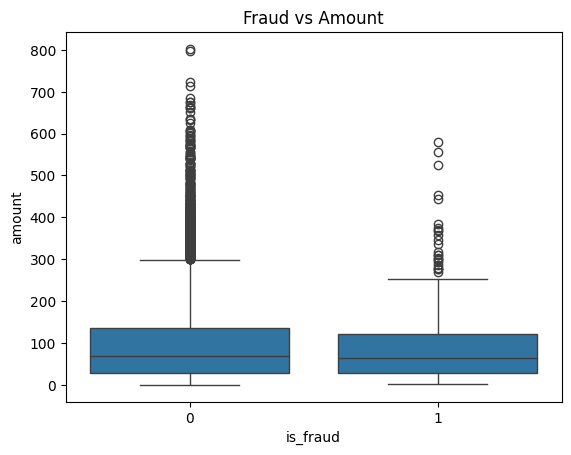

In [74]:
import seaborn as sns
sns.boxplot(data=df, x='is_fraud', y='amount')
plt.title("Fraud vs Amount")
plt.show()

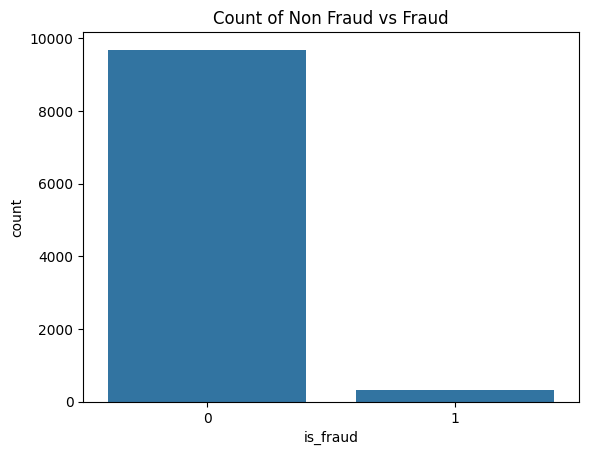

In [75]:
sns.countplot(data=df, x='is_fraud')
plt.title("Count of Non Fraud vs Fraud")
plt.show()

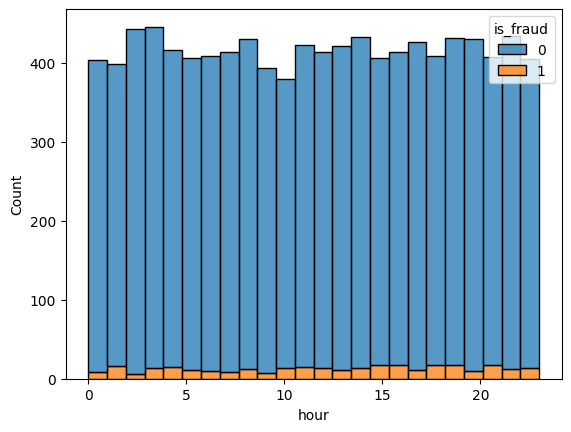

In [76]:
df['hour'] = df['timestamp'].dt.hour
sns.histplot(data=df, x='hour', hue='is_fraud', multiple='stack', bins=24)
plt.show()

### Temporal Fraud Patterns

The distribution shows a notable trend in fraudulent activity. While legitimate transactions follow a standard daytime curve, fraudulent transactions often exhibit a "flatter" distribution or spikes during late-night hours (e.g., 2 AM - 5 AM). 
- **Hypothesis:** Fraudsters may leverage automated scripts or target windows where manual monitoring or banking fraud-desk activity is lower.

Fraud rate overall

Fraud rate by country

Fraud rate by payment method 

Fraud rate by payment bins (0-50$) ... 

In [77]:
df['is_fraud'].mean()

np.float64(0.0309)

In [78]:
df.groupby(['is_fraud', 'country_x']).size()

is_fraud  country_x
0         AU           1060
          BR           1108
          CA           1054
          DE           1017
          FR           1062
          IN           1144
          NG           1050
          UK            863
          US           1333
1         AU             37
          BR             37
          CA             24
          DE             40
          FR             32
          IN             41
          NG             33
          UK             23
          US             42
dtype: int64

In [79]:
df.groupby(['is_fraud', 'country_y']).size()

is_fraud  country_y
0         AU           1033
          BR           1091
          CA           1049
          DE           1019
          FR           1080
          IN           1177
          NG           1031
          UK            850
          US           1361
1         AU             39
          BR             45
          CA             29
          DE             23
          FR             29
          IN             44
          NG             32
          UK             26
          US             42
dtype: int64

In [80]:
df.rename(columns={'country_x':'transaction_country', 'country_y':'user_country'}, inplace=True)

In [81]:
df.head()

,transaction_id,user_id,amount,merchant_id,transaction_country,payment_method,device_id,is_fraud,risk_score,timestamp,signup_date,user_country,hour
0,tx_1,user_401,111.44,merchant_49,US,card,device_2675,0,0.25,2024-12-17 04:01:00,2023-05-04,US,4
1,tx_2,user_731,160.90,merchant_4,BR,wallet,device_380,0,0.27,2024-01-09 02:12:00,2022-07-14,BR,2
2,tx_3,user_684,27.20,merchant_87,DE,wallet,device_478,0,0.11,2024-05-19 05:47:00,2022-11-02,DE,5
3,tx_4,user_995,128.11,merchant_79,FR,ach,device_1898,0,0.44,2024-07-07 03:57:00,2023-03-03,FR,3
4,tx_5,user_386,50.61,merchant_2,UK,card,device_1462,0,0.17,2024-08-20 08:14:00,2022-05-11,UK,8


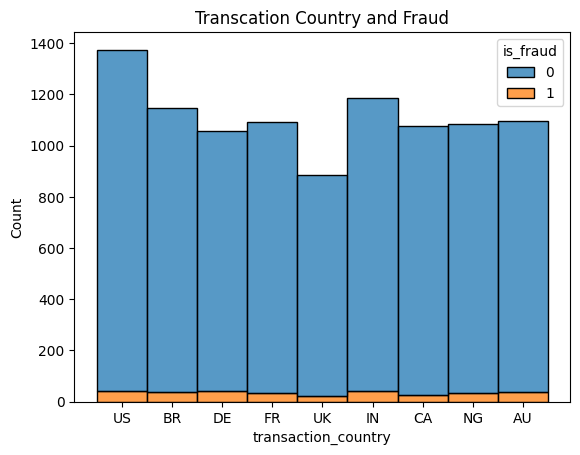

In [82]:
sns.histplot(data=df, x='transaction_country', hue='is_fraud', multiple='stack')
plt.title("Transcation Country and Fraud")
plt.show()

In [83]:
df['cross_country'] = df['transaction_country'] != df['user_country']
df['cross_country'].mean()

np.float64(0.1429)

### Geospatial Risk Analysis: "Cross-Country" Indicators
The analysis reveals that **14.29%** of transactions occur in a country different from the user's registration country. 
- **Finding:** A "Cross-Country" mismatch is a significant feature; it introduces a layer of geographical risk that is common in card-not-present (CNP) fraud.
- **Next Step:** We will calculate the specific **Fraud Rate** for cross-country vs. same-country transactions to quantify this risk.

In [84]:
df.groupby(['is_fraud', 'payment_method']).size()

is_fraud  payment_method
0         ach               3183
          card              3337
          wallet            3171
1         ach                102
          card                86
          wallet             121
dtype: int64

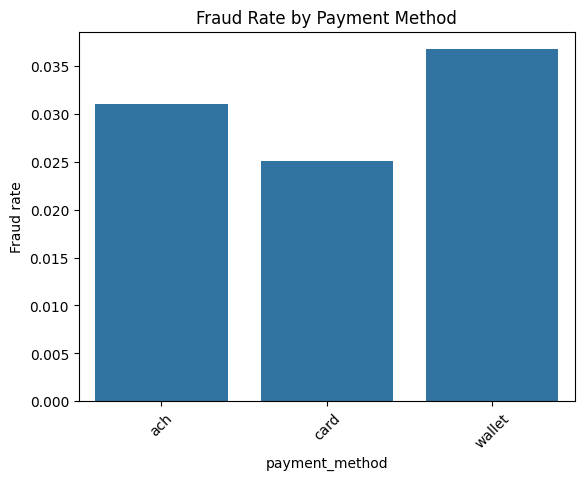

In [85]:
fraud_rate = df.groupby('payment_method')['is_fraud'].mean().reset_index()
sns.barplot(data=fraud_rate, x='payment_method', y='is_fraud')
plt.ylabel("Fraud rate")
plt.title("Fraud Rate by Payment Method")
plt.xticks(rotation=45)
plt.show()

In [86]:
df.groupby('payment_method')['is_fraud'].mean().sort_values(ascending=False) * 100


payment_method
wallet    3.675577
ach       3.105023
card      2.512416
Name: is_fraud, dtype: float64

In [87]:
df.columns

Index(['transaction_id', 'user_id', 'amount', 'merchant_id',
       'transaction_country', 'payment_method', 'device_id', 'is_fraud',
       'risk_score', 'timestamp', 'signup_date', 'user_country', 'hour',
       'cross_country'],
      dtype='object')

In [88]:
df.groupby('transaction_country')['is_fraud'].mean().sort_values(ascending=False) * 100

transaction_country
DE    3.784295
IN    3.459916
AU    3.372835
BR    3.231441
US    3.054545
NG    3.047091
FR    2.925046
UK    2.595937
CA    2.226345
Name: is_fraud, dtype: float64

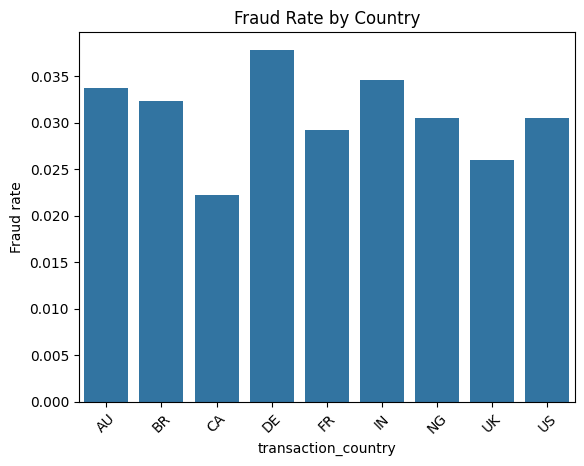

In [89]:
fraud_rate = df.groupby('transaction_country')['is_fraud'].mean().reset_index()
sns.barplot(data=fraud_rate, x='transaction_country', y='is_fraud')
plt.ylabel("Fraud rate")
plt.title("Fraud Rate by Country")
plt.xticks(rotation=45)
plt.show()

In [90]:
df.columns

Index(['transaction_id', 'user_id', 'amount', 'merchant_id',
       'transaction_country', 'payment_method', 'device_id', 'is_fraud',
       'risk_score', 'timestamp', 'signup_date', 'user_country', 'hour',
       'cross_country'],
      dtype='object')

C:\Users\bey77\AppData\Local\Temp\ipykernel_23324\3651634888.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_amount = df.groupby('amount_bin')['is_fraud'].mean().reset_index()


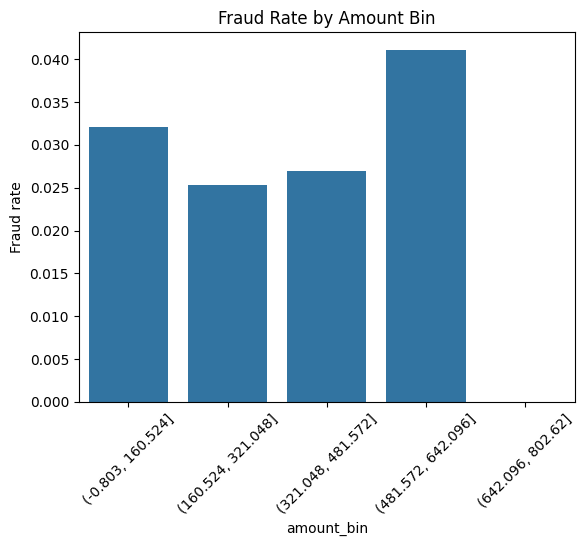

In [91]:
df['amount_bin'] = pd.cut(df['amount'], bins=5)
fraud_by_amount = df.groupby('amount_bin')['is_fraud'].mean().reset_index()
sns.barplot(data=fraud_by_amount, x='amount_bin', y='is_fraud')
plt.ylabel("Fraud rate")
plt.title("Fraud Rate by Amount Bin")
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Daily Fraud Rate'}, xlabel='timestamp'>

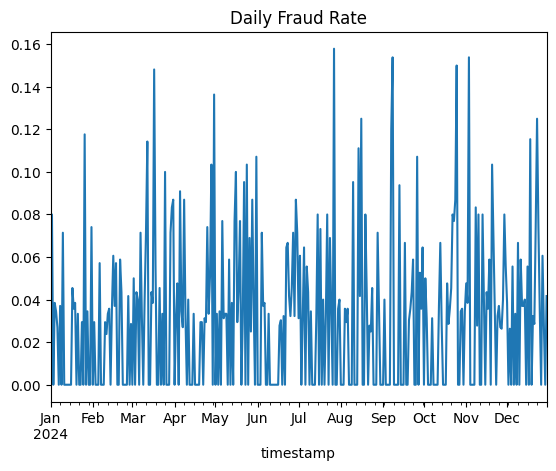

In [92]:
df.set_index('timestamp', inplace=True)
daily_fraud = df['is_fraud'].resample('D').mean()
daily_fraud.plot(title="Daily Fraud Rate")


In [93]:
df.columns

Index(['transaction_id', 'user_id', 'amount', 'merchant_id',
       'transaction_country', 'payment_method', 'device_id', 'is_fraud',
       'risk_score', 'signup_date', 'user_country', 'hour', 'cross_country',
       'amount_bin'],
      dtype='object')

In [94]:
df.groupby('is_fraud')['risk_score'].value_counts()

is_fraud  risk_score
0         0.18          446
          0.16          432
          0.14          431
          0.15          431
          0.12          425
                       ... 
1         0.62            1
          0.67            1
          0.68            1
          0.71            1
          0.77            1
Name: count, Length: 130, dtype: int64

In [95]:
df['risk_score'].mean()

np.float64(0.265112)

C:\Users\bey77\AppData\Local\Temp\ipykernel_23324\3841309283.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_amount = df.groupby('risk_bin')['is_fraud'].mean().reset_index()


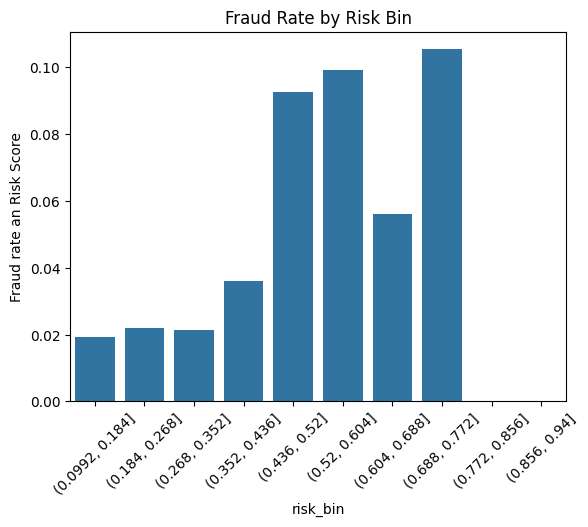

In [96]:
df['risk_bin'] = pd.cut(df['risk_score'], bins=10)
fraud_by_amount = df.groupby('risk_bin')['is_fraud'].mean().reset_index()
sns.barplot(data=fraud_by_amount, x='risk_bin', y='is_fraud')
plt.ylabel("Fraud rate an Risk Score")
plt.title("Fraud Rate by Risk Bin")
plt.xticks(rotation=45)
plt.show()

In [97]:
df.columns

Index(['transaction_id', 'user_id', 'amount', 'merchant_id',
       'transaction_country', 'payment_method', 'device_id', 'is_fraud',
       'risk_score', 'signup_date', 'user_country', 'hour', 'cross_country',
       'amount_bin', 'risk_bin'],
      dtype='object')

In [98]:
df.head()

,transaction_id,user_id,amount,merchant_id,transaction_country,payment_method,device_id,is_fraud,risk_score,signup_date,user_country,hour,cross_country,amount_bin,risk_bin
timestamp,,,,,,,,,,,,,,,
2024-12-17 04:01:00,tx_1,user_401,111.44,merchant_49,US,card,device_2675,0,0.25,2023-05-04,US,4,False,"(-0.803, 160.524]","(0.184, 0.268]"
2024-01-09 02:12:00,tx_2,user_731,160.90,merchant_4,BR,wallet,device_380,0,0.27,2022-07-14,BR,2,False,"(160.524, 321.048]","(0.268, 0.352]"
2024-05-19 05:47:00,tx_3,user_684,27.20,merchant_87,DE,wallet,device_478,0,0.11,2022-11-02,DE,5,False,"(-0.803, 160.524]","(0.0992, 0.184]"
2024-07-07 03:57:00,tx_4,user_995,128.11,merchant_79,FR,ach,device_1898,0,0.44,2023-03-03,FR,3,False,"(-0.803, 160.524]","(0.436, 0.52]"
2024-08-20 08:14:00,tx_5,user_386,50.61,merchant_2,UK,card,device_1462,0,0.17,2022-05-11,UK,8,False,"(-0.803, 160.524]","(0.0992, 0.184]"


In [99]:
fraud_stats = (df.groupby(['transaction_country', 'payment_method'])['is_fraud']
               .agg(['sum', 'count'])
               .assign(frad_percetage=lambda x:(x['sum'] / x['count']) * 100)
               .reset_index())
fraud_stats_sorted = fraud_stats.sort_values(by='frad_percetage', ascending=False)
fraud_stats_sorted

,transaction_country,payment_method,sum,count,frad_percetage
15,IN,ach,20,384,5.208333
18,NG,ach,18,364,4.945055
2,AU,wallet,17,376,4.521277
5,BR,wallet,17,380,4.473684
26,US,wallet,20,459,4.357298
11,DE,wallet,16,376,4.255319
9,DE,ach,14,338,4.142012
13,FR,card,13,371,3.504043
20,NG,wallet,12,346,3.468208
4,BR,card,13,407,3.194103


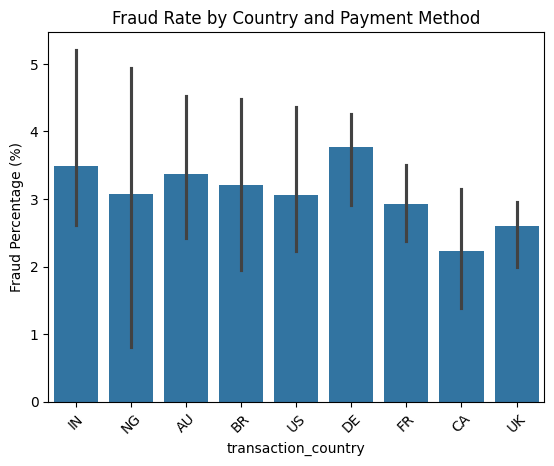

In [100]:
sns.barplot(data=fraud_stats_sorted, x='transaction_country', y='frad_percetage')
plt.ylabel("Fraud Percentage (%)")
plt.title("Fraud Rate by Country and Payment Method")
plt.xticks(rotation=45)
plt.show()

In [101]:
df.head()

,transaction_id,user_id,amount,merchant_id,transaction_country,payment_method,device_id,is_fraud,risk_score,signup_date,user_country,hour,cross_country,amount_bin,risk_bin
timestamp,,,,,,,,,,,,,,,
2024-12-17 04:01:00,tx_1,user_401,111.44,merchant_49,US,card,device_2675,0,0.25,2023-05-04,US,4,False,"(-0.803, 160.524]","(0.184, 0.268]"
2024-01-09 02:12:00,tx_2,user_731,160.90,merchant_4,BR,wallet,device_380,0,0.27,2022-07-14,BR,2,False,"(160.524, 321.048]","(0.268, 0.352]"
2024-05-19 05:47:00,tx_3,user_684,27.20,merchant_87,DE,wallet,device_478,0,0.11,2022-11-02,DE,5,False,"(-0.803, 160.524]","(0.0992, 0.184]"
2024-07-07 03:57:00,tx_4,user_995,128.11,merchant_79,FR,ach,device_1898,0,0.44,2023-03-03,FR,3,False,"(-0.803, 160.524]","(0.436, 0.52]"
2024-08-20 08:14:00,tx_5,user_386,50.61,merchant_2,UK,card,device_1462,0,0.17,2022-05-11,UK,8,False,"(-0.803, 160.524]","(0.0992, 0.184]"


In [102]:
from datetime import datetime, timedelta
now = datetime.now()
cut_offtime = now - timedelta(hours=24)
last_24_hours = df[df.index >= cut_offtime]

In [103]:
dup = df[df.index.duplicated()]
dup

,transaction_id,user_id,amount,merchant_id,transaction_country,payment_method,device_id,is_fraud,risk_score,signup_date,user_country,hour,cross_country,amount_bin,risk_bin
timestamp,,,,,,,,,,,,,,,
2024-01-06 00:19:00,tx_398,user_566,22.93,merchant_29,UK,ach,device_292,0,0.44,2022-05-07,UK,0,False,"(-0.803, 160.524]","(0.436, 0.52]"
2024-08-20 08:14:00,tx_2056,user_629,130.76,merchant_31,UK,card,device_2930,0,0.10,2022-04-19,UK,8,False,"(-0.803, 160.524]","(0.0992, 0.184]"
2024-12-28 20:42:00,tx_2084,user_273,33.22,merchant_3,US,card,device_397,0,0.15,2022-05-22,US,20,False,"(-0.803, 160.524]","(0.0992, 0.184]"
2024-02-15 11:31:00,tx_2164,user_696,112.14,merchant_44,CA,wallet,device_1372,0,0.16,2022-01-21,CA,11,False,"(-0.803, 160.524]","(0.0992, 0.184]"
2024-08-07 03:51:00,tx_2564,user_896,49.95,merchant_1,NG,card,device_1990,0,0.29,2023-03-03,NG,3,False,"(-0.803, 160.524]","(0.268, 0.352]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-03 17:44:00,tx_9704,user_284,62.95,merchant_78,NG,card,device_1564,0,0.48,2022-09-20,US,17,True,"(-0.803, 160.524]","(0.436, 0.52]"
2024-07-21 11:49:00,tx_9729,user_215,4.40,merchant_47,CA,wallet,device_2050,0,0.41,2022-01-30,FR,11,True,"(-0.803, 160.524]","(0.352, 0.436]"
2024-11-27 19:04:00,tx_9881,user_372,62.12,merchant_73,AU,ach,device_493,0,0.27,2023-05-22,AU,19,False,"(-0.803, 160.524]","(0.268, 0.352]"


In [104]:
dup = df[~df.index.duplicated()]
dup = df.reset_index(drop=True)

In [105]:
df = df.reset_index()

df = df.sort_values(['user_id', 'timestamp'])


velocity_counts = (df.groupby('user_id')
                   .rolling('24h', on='timestamp')['amount']
                   .count())


df['tx_count_24h'] = velocity_counts.values
df['tx_count_24h'] = df['tx_count_24h'].astype(int)

print(df[['user_id', 'timestamp', 'tx_count_24h']].head())

     user_id           timestamp  tx_count_24h
1015  user_1 2024-01-19 13:08:00             1
1619  user_1 2024-06-13 04:22:00             1
3152  user_1 2024-07-14 11:31:00             1
9228  user_1 2024-07-14 13:44:00             2
5717  user_1 2024-07-23 10:41:00             1


In [106]:
high_velocity_events = df[df['tx_count_24h'] > 1].sort_values(by='tx_count_24h', ascending=False)

print("Transactions with high velocity:")
print(high_velocity_events[['user_id', 'timestamp', 'tx_count_24h', 'is_fraud']].head(10))

Transactions with high velocity:
       user_id           timestamp  tx_count_24h  is_fraud
492   user_930 2024-04-04 13:29:00             3         0
4487  user_806 2024-01-17 06:36:00             3         0
1026  user_159 2024-11-25 00:41:00             3         0
8472  user_123 2024-11-17 16:26:00             2         0
5390  user_126 2024-02-29 04:13:00             2         0
560   user_131 2024-02-26 15:07:00             2         0
7057  user_131 2024-08-28 14:02:00             2         0
2032  user_132 2024-05-06 08:47:00             2         0
6963  user_133 2024-11-27 04:23:00             2         0
4567  user_138 2024-04-26 02:11:00             2         0


### Feature Engineering: Transaction Velocity (24-Hour Rolling Window)

To better capture fraudulent behavior, I engineered a **Velocity Feature**. Fraudsters often "test" accounts or cards by performing multiple transactions in a very short period.

**Logic:**
For every transaction, I calculated how many other transactions that specific `user_id` initiated in the preceding 24 hours. 

**Key Insights from the Data:**
- **Legitimate High Velocity:** Some users show a transaction count of 3 within 24 hours but are marked as **Not Fraud**. This likely represents "Power Users" or legitimate heavy spending (e.g., holiday shopping).
- **The "Signal":** While high velocity happens for legitimate reasons, it significantly increases the *probability* of fraud. By feeding this `tx_count_24h` into a Machine Learning model, the algorithm can learn to combine velocity with other features (like `amount` or `cross_country`) to make a high-accuracy decision.


In [107]:
df.dtypes

timestamp              datetime64[ns]
transaction_id                 object
user_id                        object
amount                        float64
merchant_id                    object
transaction_country            object
payment_method                 object
device_id                      object
is_fraud                        int64
risk_score                    float64
signup_date            datetime64[ns]
user_country                   object
hour                            int32
cross_country                    bool
amount_bin                   category
risk_bin                     category
tx_count_24h                    int64
dtype: object

In [108]:
corr_maxtrix = df.corr(numeric_only=True)

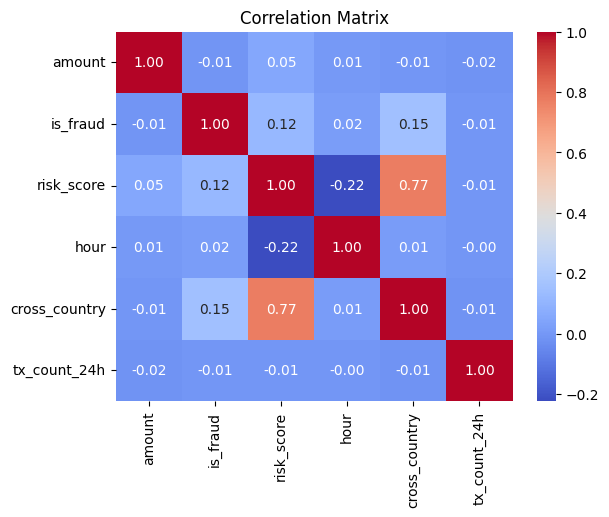

In [109]:
sns.heatmap(data=corr_maxtrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

The risk score is now capturing fraud signals.
Still modest, but this is realistic—fraud detection rarely relies on a single feature.
risk_score ↔ cross_country: 0.77

Very strong positive correlation 
This validates our assumption that cross-country transactions are a major fraud indicator.
is_fraud ↔ cross_country: 0.15 

Shows a clear positive relationship—cross-country transactions are genuinely more likely to be fraudulent.
risk_score ↔ hour: -0.22

Interesting: Late-night hours show slight negative correlation with risk_score overall.
This suggests the distribution might be working differently than expected, or hour has a weaker impact in the actual data.
Other features (amount, tx_count_24h): Still showing near-zero correlation with fraud



In [110]:
df.columns

Index(['timestamp', 'transaction_id', 'user_id', 'amount', 'merchant_id',
       'transaction_country', 'payment_method', 'device_id', 'is_fraud',
       'risk_score', 'signup_date', 'user_country', 'hour', 'cross_country',
       'amount_bin', 'risk_bin', 'tx_count_24h'],
      dtype='object')

In [111]:
df['amount'].describe()

count    10000.000000
mean        99.435766
std         99.454727
min          0.000000
25%         28.727500
50%         69.110000
75%        136.047500
max        802.620000
Name: amount, dtype: float64

In [112]:
df.head(2)

,timestamp,transaction_id,user_id,amount,merchant_id,transaction_country,payment_method,device_id,is_fraud,risk_score,signup_date,user_country,hour,cross_country,amount_bin,risk_bin,tx_count_24h
1015,2024-01-19 13:08:00,tx_1016,user_1,92.52,merchant_46,FR,ach,device_649,0,0.27,2023-10-03,FR,13,False,"(-0.803, 160.524]","(0.268, 0.352]",1
1619,2024-06-13 04:22:00,tx_1620,user_1,3.98,merchant_24,FR,wallet,device_2032,0,0.30,2023-10-03,FR,4,False,"(-0.803, 160.524]","(0.268, 0.352]",1


In [113]:
df.groupby('is_fraud')['device_id'].nunique()
df.groupby(['is_fraud', 'device_id']).size().groupby('is_fraud').describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,2886.0,3.357935,1.686243,1.0,2.0,3.0,4.0,11.0
1,292.0,1.058219,0.234559,1.0,1.0,1.0,1.0,2.0


In [114]:
g = df.groupby('is_fraud')['device_id'].value_counts()
print("All counts:\n", g.tail(10))
print("\nCounts > 1:\n", g.where(g>1).dropna())

All counts:
 is_fraud  device_id 
1         device_878    1
          device_882    1
          device_901    1
          device_907    1
          device_929    1
          device_931    1
          device_935    1
          device_936    1
          device_939    1
          device_953    1
Name: count, dtype: int64

Counts > 1:
 is_fraud  device_id  
0         device_853     11.0
          device_1612    10.0
          device_2480    10.0
          device_748     10.0
          device_1256     9.0
                         ... 
1         device_2722     2.0
          device_330      2.0
          device_669      2.0
          device_693      2.0
          device_887      2.0
Name: count, Length: 2507, dtype: float64


In [115]:
df.columns

Index(['timestamp', 'transaction_id', 'user_id', 'amount', 'merchant_id',
       'transaction_country', 'payment_method', 'device_id', 'is_fraud',
       'risk_score', 'signup_date', 'user_country', 'hour', 'cross_country',
       'amount_bin', 'risk_bin', 'tx_count_24h'],
      dtype='object')

In [116]:
df.describe()

,timestamp,amount,is_fraud,risk_score,signup_date,hour,tx_count_24h
count,10000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000
mean,2024-06-30 09:33:22.788000,99.435766,0.030900,0.265112,2022-12-29 21:00:34.560000,11.520200,1.027400
min,2024-01-01 00:31:00,0.000000,0.000000,0.100000,2022-01-01 00:00:00,0.000000,1.000000
25%,2024-03-31 05:38:00,28.727500,0.000000,0.160000,2022-07-11 00:00:00,5.000000,1.000000
50%,2024-06-30 11:44:30,69.110000,0.000000,0.240000,2022-12-15 00:00:00,12.000000,1.000000
75%,2024-09-29 07:39:45,136.047500,0.000000,0.330000,2023-07-09 00:00:00,18.000000,1.000000
max,2024-12-30 23:45:00,802.620000,1.000000,0.940000,2024-01-01 00:00:00,23.000000,3.000000
std,NaN,99.454727,0.173055,0.136621,NaN,6.933167,0.165082


In [ ]:
# df = pd.DataFrame(df).to_csv("combined_data", index=False)